<a href="https://colab.research.google.com/github/HttpYoussef/CodeAlpha_Unemployment_Analysis_with_Python/blob/main/unimpolyment_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn statsmodels scipy


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_ind


In [3]:
df = pd.read_csv("Unemployment in India.csv")


df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")


print(df.head())
print(df.isna().sum())


             region       date frequency  estimated_unemployment_rate_(%)  \
0    Andhra Pradesh 2019-05-31   Monthly                             3.65   
290       Telangana 2019-05-31   Monthly                             2.23   
276      Tamil Nadu 2019-05-31   Monthly                             0.97   
257       Rajasthan 2019-05-31   Monthly                             4.03   
243          Punjab 2019-05-31   Monthly                             9.17   

     estimated_employed  estimated_labour_participation_rate_(%)   area  
0            11999139.0                                    43.24  Rural  
290          11053353.0                                    61.74  Rural  
276          15844698.0                                    49.44  Rural  
257          15226005.0                                    38.52  Rural  
243           6088547.0                                    44.79  Rural  
region                                     28
date                                       28
f

/tmp/ipython-input-3-1420660303.py:7: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date"] = pd.to_datetime(df["date"])


14


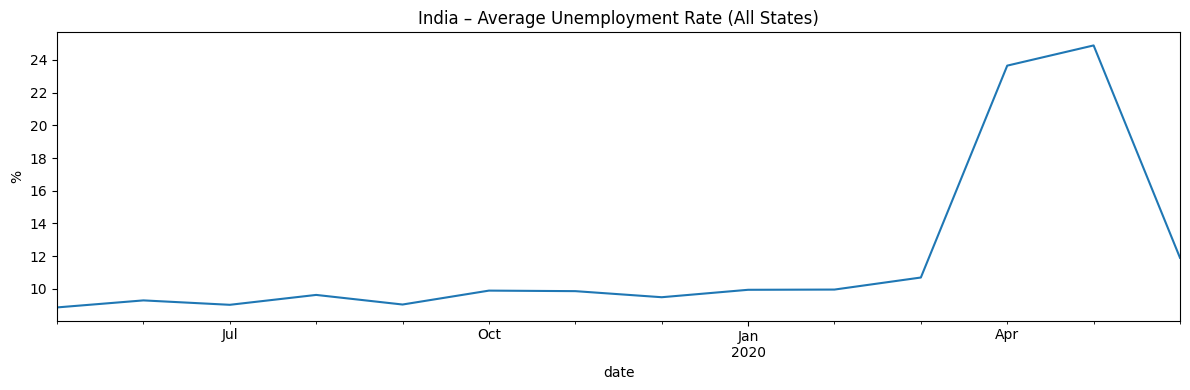

In [11]:
natl_ts = (
    df.groupby("date")["estimated_unemployment_rate_(%)"]
      .mean()
      .rename("national_unemp_rate")
)
natl_ts.index = pd.to_datetime(natl_ts.index)

print(len(natl_ts))
plt.figure(figsize=(12,4))
natl_ts.plot()
plt.title("India – Average Unemployment Rate (All States)")
plt.ylabel("%")
plt.tight_layout()
plt.show()

In [12]:
pre_covid = natl_ts.loc[: "2020-02-01"]
covid_era = natl_ts.loc["2020-03-01" : "2022-12-01"]

print(f"Pre‑Covid mean : {pre_covid.mean():.2f}%")
print(f"Covid‑era mean : {covid_era.mean():.2f}%")

t_stat, p_val = ttest_ind(covid_era, pre_covid, equal_var=False)
print(f"t‑stat = {t_stat:.2f}   p‑value = {p_val:.4f}")


Pre‑Covid mean : 9.46%
Covid‑era mean : 17.78%
t‑stat = 2.21   p‑value = 0.1134


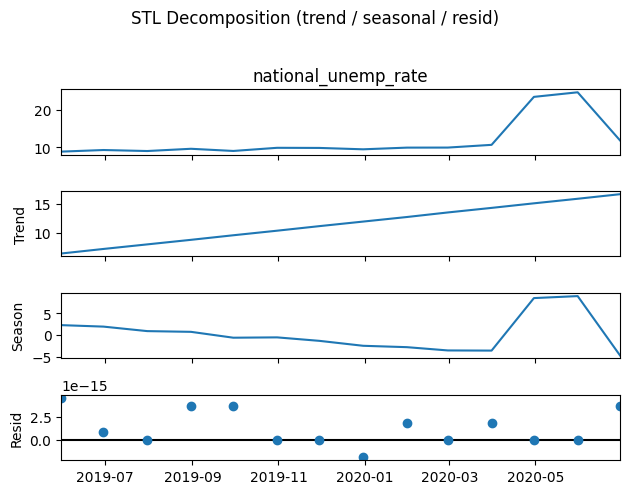

In [14]:
from statsmodels.tsa.seasonal import STL

stl = STL(natl_ts, period=12, robust=True)
res = stl.fit()

res.plot()
plt.suptitle("STL Decomposition (trend / seasonal / resid)", y=1.02)
plt.tight_layout()
plt.show()


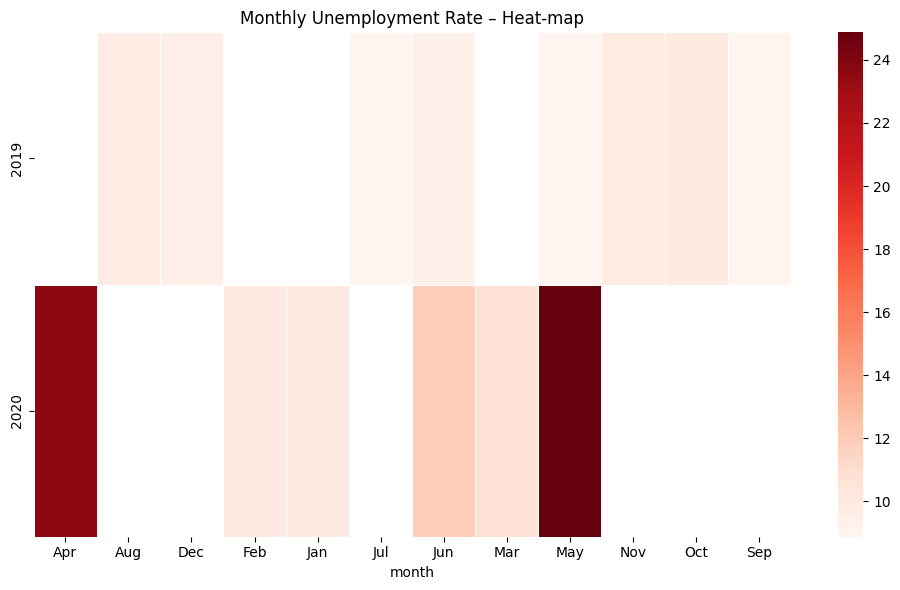

In [16]:
heat_df = (
    natl_ts.reset_index()
           .assign(year=lambda d: d["date"].dt.year,
                   month=lambda d: d["date"].dt.month_name().str[:3])
           .pivot(index="year", columns="month", values="national_unemp_rate")
)

plt.figure(figsize=(10,6))
sns.heatmap(heat_df, cmap="Reds", linewidths=.4, linecolor="white")
plt.title("Monthly Unemployment Rate – Heat‑map")
plt.ylabel("")
plt.tight_layout()
plt.show()